<center><h1 style="color: pink"> Welcome to the Airbnb Mini Practice Project </h1>


<img src = "airbnb.png" width="1100" height="600">

This Airbnb mini project focuses on exploring data to identify the neighborhoods and room types that generate the highest revenue in New York City. The project will utilize the Pandas libraries:

<li> Matplotlib </li>
<li> Pandas </li> 
    


In [48]:
import pandas as pd
df=pd.read_csv('airbnb_2.csv')
df.head(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,19/10/2018,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,21/05/2019,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365


In [13]:
df.isna().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

<b> i)  We need to find out among the 5 Neighbourhood Groups (Manhattan, Brooklyn, Queens, Bronx, Staten Island) which Neighbourhood Groups has the largest number of Airbnb Listings </b>



<p>

In [50]:
# The largest listing group is Manhattan with 21661 listings.

df['neighbourhood_group'].value_counts().sort_values()

neighbourhood_group
Staten Island      373
Bronx             1091
Queens            5666
Brooklyn         20104
Manhattan        21661
Name: count, dtype: int64

We want to focus our attention on the Neighbourhood Groups that have the top 3 number of Airbnb Listings by calculating the % listings.

<b> ii) Calculate the % listings that each Neighbourhood Group contains. </b>


In [52]:

df['neighbourhood_group'].value_counts(normalize=True)

neighbourhood_group
Manhattan        0.443011
Brooklyn         0.411167
Queens           0.115881
Bronx            0.022313
Staten Island    0.007629
Name: proportion, dtype: float64

<b> iii) We need to create a new calculated field called Revenue. This is to be calculated by using the Price Column x Number_Of_Reviews Columns </b>


In [54]:
df['revenue']=df['price']*df['number_of_reviews']
df['neighbourhood_group'] = df['neighbourhood_group'].str.strip()
df['neighbourhood'] = df['neighbourhood'].str.strip()
df['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

<b> iv) Create a Bar Plot that shows which Neighbourhood Group has the highest average revenues. </b>



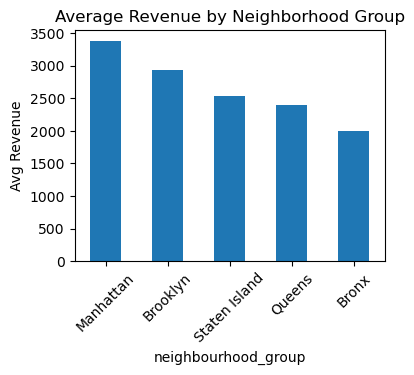

In [56]:
import matplotlib.pyplot as plt
g=df.groupby('neighbourhood_group')['revenue'].mean().sort_values(ascending=False)
g.plot(kind='bar', ylabel='Avg Revenue',title='Average Revenue by Neighborhood Group', rot=45)
plt.gcf().set_size_inches(4,3) # set the weight and height in inches
plt.show()

<b> V) We are also interested in the Neighbourhood Groups `Manhattan`, `Brooklyn` and `Queens`, and wants to find out more about business among these areas.
    
 </b>

    


In [58]:
# step 1 filter data to only include the three neighborhood_groups
df_f=df[df['neighbourhood_group'].isin(['Manhattan','Brooklyn','Queens'])]

# step 2 group by and aggregate revenue on each neighborhood, reset index
g_f=df_f.groupby(['neighbourhood_group','neighbourhood']).agg({'revenue':'sum'}).reset_index()

# step 3 sort value based on neigh_group and revenue
s = g_f.sort_values(by=['neighbourhood_group', 'revenue'], ascending=[True, False])

# rank revenue within each neigh_group, and add a rank column
s['rank'] = s.groupby('neighbourhood_group')['revenue'].rank(ascending=False)

# print out the top 3 ranked 9 neighborhood list
top3= s[s['rank'] <=3]


<b> VI) Building on the previous question where you identified the top 3 Neighbourhoods within each of the three neighbourhood_groups based off Revenues, identify the  <b>`top average revenue generating room type`</b> for each of the nine neighbourhoods and plot this out in a Bar Chart.</b>



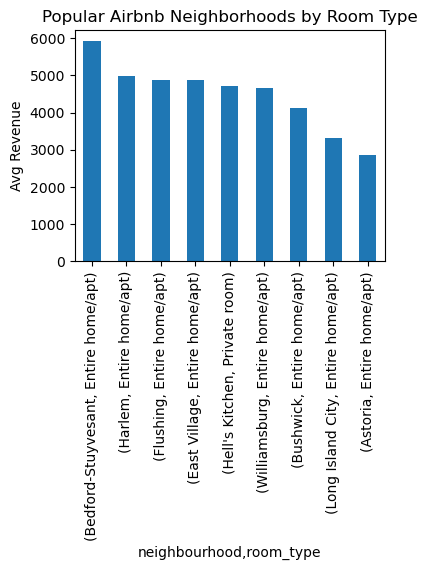

In [60]:
# step 1 fetch the list of 9 neighborhood and store it in a list
l=top3['neighbourhood'].unique().tolist()

# step 2 filter airbnb dataframe to only include rows that are in the range of the neighborhood list.
df2=df[df['neighbourhood'].isin(l)]

# step 3 find root types with the most revenue
df3=df2.groupby(['neighbourhood','room_type'])['revenue'].mean()

# step 4 find out the room type which produced No.1 revenue
df3=df3.sort_values(ascending=False)
top1= df3.groupby('neighbourhood').head(1)

# step 5 plot a bar chart
top1.plot(kind='bar',ylabel='Avg Revenue', title='Popular Airbnb Neighborhoods by Room Type')
plt.gcf().set_size_inches(4,3) # set the weight and height in inches
plt.show()

### End of project